In [425]:
# Dependencies
%matplotlib inline
import matplotlib as pyplot
from matplotlib import style
style.use('fivethirtyeight')


In [426]:
# Import Pandas 
import pandas as pd
import numpy as np


In [427]:
# Import Date-Time library
import datetime as dt


In [428]:
# Import SQL Alchemy Libraries
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [429]:
# Import SQLite Database into engine 
engine = create_engine("sqlite:///./hawaii.sqlite", echo=False)


In [430]:
# Inspect the DataBase
Inspector = inspect(engine)
table = Inspector.get_table_names()

In [431]:
# Get column names
print(table[0])
print("---------------")
for column in Inspector.get_columns(table[0]):
    print(column['name'], column['type'])

print(" ")
print(table[1])
print("---------------")
for column in Inspector.get_columns(table[1]):
    print(column['name'], column['type'])


measurement
---------------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
 
station
---------------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [432]:
# Define Base Class to map the tables
Base = automap_base()

Base.prepare(engine,reflect=True)


In [433]:
# Find tables from the database
Base.classes.keys()


['measurement', 'station']

In [434]:
# Save each table in a table class 
Measurement = Base.classes.measurement
Station = Base.classes.station


In [435]:
# Create session from Python to DataBase
session = Session(engine)


In [436]:
# 1. Precipitation Analysis

import time
from datetime import datetime

# Select Trip Start Date and Trip End Date
trip_start = dt.date(2017,2,1)
trip_end = dt.date(2017,2,16)


# Design a query to retrieve the last 12 months of precipitation data.
prec_count = session.query(Measurement.date).count()
print(f"Number of Recorded Precipitation: {prec_count}")

# Get the latest date from the table.
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Latest Date: {max_date}")

#Split the date into integers
max_date= max_date.date
print(f"Latest Date: {max_date}")

# Split the Year, Date and Month 
year = max_date.split('-')
yr=int(year[0])
mt=int(year[1])
dy=int(year[2])
print(yr,mt,dy)
print(type(yr))

#m_date = datetime.fromtimestamp(max_date).strftime('%Y-%m-%d')
#print()
last_12_month = dt.date(yr,mt,dy) - dt.timedelta(days=365)
# Get past year date by subtracting 365 days from the max date 
#last_12_month = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"Last Year Date: {last_12_month}")


Number of Recorded Precipitation: 19550
Latest Date: ('2017-08-23',)
Latest Date: 2017-08-23
2017 8 23
<class 'int'>
Last Year Date: 2016-08-23


In [437]:
# Retreive last 12 months Precipation Data from the Measurement Table.
prec_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=last_12_month)\
                    .order_by(Measurement.date).all()

for data in prec_data[:10]:
    print(data)

#data.date


('2016-08-23', 0.0)
('2016-08-23', 0.15)
('2016-08-23', 0.05)
('2016-08-23', None)
('2016-08-23', 0.02)
('2016-08-23', 1.79)
('2016-08-23', 0.7)
('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)


In [438]:
# Convert the Precipitation Data into DataFrame
prec_df = pd.DataFrame(prec_data,index=None)

# Drop Non-Numeric Rows
prec_df = prec_df.dropna()

# Display DataFrame
prec_df.head(10)

# Set Index on Date Column
prec_df = prec_df.set_index('date')

# Display DataFrame
prec_df.head(10)


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


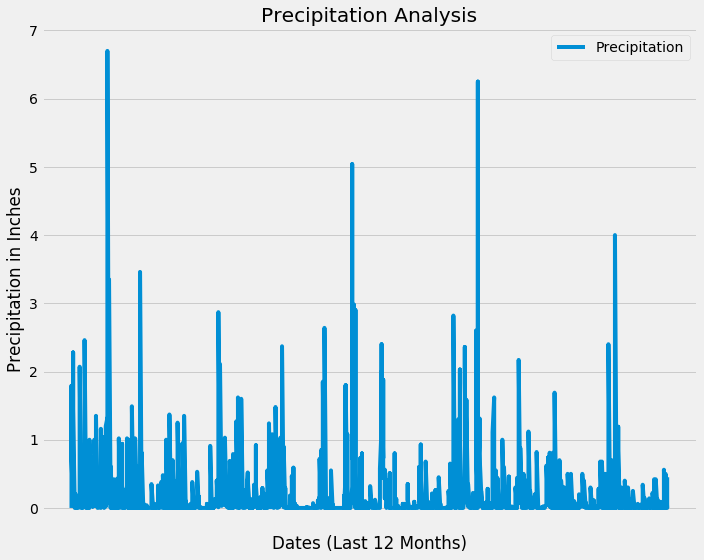

In [439]:
# Plot the results using the DataFrame plot method.
# Plot the Precipitation Data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(prec_df['prcp'])
plt.xticks([])
plt.grid(alpha=True)
plt.legend(["Precipitation"],loc='best')
plt.title("Precipitation Analysis")
plt.xlabel('Dates (Last 12 Months)')
plt.ylabel('Precipitation in Inches')

plt.tight_layout()
plt.savefig('Precipitation.png')
plt.show()


In [440]:
# Use Pandas to print the summary statistics for the precipitation data.
# Use "Describe" method

prec_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [441]:
# Station Analysis


In [442]:
# Design a query to calculate the total number of stations.

station_count = session.query(Station.id).count()
print("Total number of stations",station_count)

# Check the values in both Measurement and Station Table

print(" ---Station Table---  ")
station_name = session.query(Station.id,Station.station, Station.name).all()

for station in station_name:
    print(f"{station.id}....{station.station}....{station.name}")

print(' ')

print(' ---Measurement Table---  ')

meas_name = session.query(Measurement.id,Measurement.station,Measurement.tobs).limit(20).all()

for measure in meas_name:
    print(f"{measure.id}....{measure.station}....{measure.tobs}")
    


Total number of stations 9
 ---Station Table---  
1....USC00519397....WAIKIKI 717.2, HI US
2....USC00513117....KANEOHE 838.1, HI US
3....USC00514830....KUALOA RANCH HEADQUARTERS 886.9, HI US
4....USC00517948....PEARL CITY, HI US
5....USC00518838....UPPER WAHIAWA 874.3, HI US
6....USC00519523....WAIMANALO EXPERIMENTAL FARM, HI US
7....USC00519281....WAIHEE 837.5, HI US
8....USC00511918....HONOLULU OBSERVATORY 702.2, HI US
9....USC00516128....MANOA LYON ARBO 785.2, HI US
 
 ---Measurement Table---  
1....USC00519397....65.0
2....USC00519397....63.0
3....USC00519397....74.0
4....USC00519397....76.0
5....USC00519397....73.0
6....USC00519397....70.0
7....USC00519397....64.0
8....USC00519397....68.0
9....USC00519397....73.0
10....USC00519397....64.0
11....USC00519397....61.0
12....USC00519397....66.0
13....USC00519397....65.0
14....USC00519397....68.0
15....USC00519397....64.0
16....USC00519397....72.0
17....USC00519397....66.0
18....USC00519397....66.0
19....USC00519397....69.0
20....USC005

In [443]:
# Design a query to find the most active stations.
#List the stations and observation counts in descending order.

active_station = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station)\
                .order_by(func.count(Measurement.tobs).desc()).all()

for record in active_station:
    [station, count] = record
    print(f"This station {station} has {count} observations.")


#Which station has the highest number of observations?
print(" ")
print("----------------------------------------------------------------------------------------")
print(f"The busiest station is the station {active_station[0][0]} with observations count of {active_station[0][1]}.")
print("----------------------------------------------------------------------------------------")



This station USC00519281 has 2772 observations.
This station USC00519397 has 2724 observations.
This station USC00513117 has 2709 observations.
This station USC00519523 has 2669 observations.
This station USC00516128 has 2612 observations.
This station USC00514830 has 2202 observations.
This station USC00511918 has 1979 observations.
This station USC00517948 has 1372 observations.
This station USC00518838 has 511 observations.
 
----------------------------------------------------------------------------------------
The busiest station is the station USC00519281 with observations count of 2772.
----------------------------------------------------------------------------------------


In [444]:
#Print the Minimum, Maximum and Average Temperatures for most active station
#Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.

sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs),
       func.count(Measurement.tobs)]

act_station_stat = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

print(f"The most active station {act_station_stat[0][0]} observations shown below.")
print(f"Minimum Temperature: {act_station_stat[0][1]} ")
print(f"Maximum Temperature: {act_station_stat[0][2]} ")
print("Average Temperature:","{0:.2f}".format(act_station_stat[0][3]))
print(f"Count Observed: {act_station_stat[0][4]} ")


The most active station USC00519281 observations shown below.
Minimum Temperature: 54.0 
Maximum Temperature: 85.0 
Average Temperature: 71.66
Count Observed: 2772 


In [445]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
# Most Active Station
station = act_station_stat[0][0]

#Query Last 12 months Temperatures for most active station
last_year_temp = session.query(Measurement.tobs).filter(Measurement.date>=last_12_month).\
                filter(Measurement.station == station).order_by(Measurement.date).all()

# Create a DataFrame for Temperatures
temperature_df = pd.DataFrame(last_year_temp)
temperature_df.head(10)



,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
5,73.0
6,78.0
7,77.0
8,78.0
9,80.0


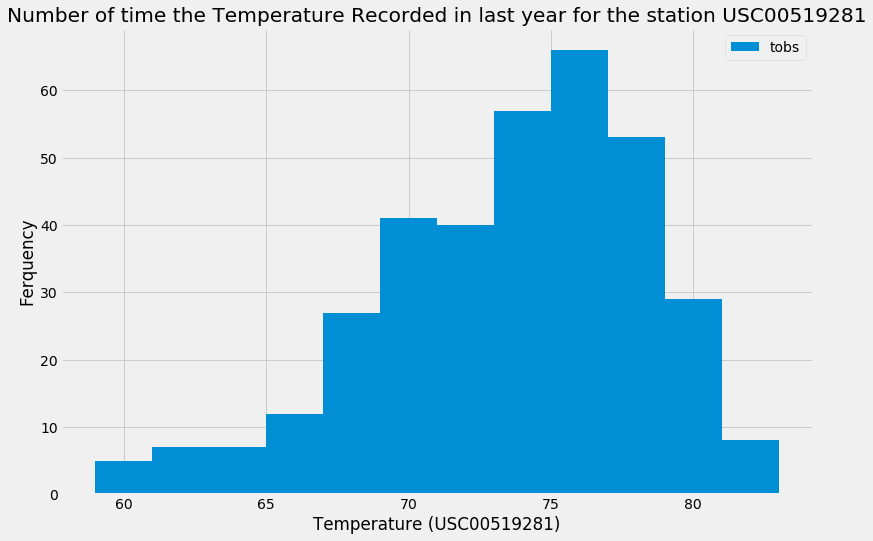

In [446]:
#Plot the results as a histogram with bins=12.
plt.figure(figsize=(12,8))

plt.hist(temperature_df['tobs'],bins=12)
plt.legend(["tobs"],loc='best')
plt.xlabel(f"Temperature ({station})")
plt.ylabel("Ferquency")
plt.title(f"Number of time the Temperature Recorded in last year for the station {station}")

plt.savefig('Temp Freq Histogram.png')
plt.show()


In [447]:
# Temperature Analysis (Optional)


# The starter notebook contains a function called calc_temps that will accept a start date and end date 
#       in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the 
#       matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

#Plot the min, avg, and max temperature from your previous query as a bar chart.


#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [448]:
# The starter notebook contains a function called calc_temps that will accept a start date and end date 
#       in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the 
#       matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

# Trip Previous Start Date and Trip Previous End Date
trip_prev_start = trip_start - dt.timedelta(days=365)
trip_prev_end = trip_end - dt.timedelta(days=365)

print(f"Previous Year Trip Start Date: {trip_prev_start}")
print(f"Previous Year Trip End Date: {trip_prev_end}")


Previous Year Trip Start Date: 2016-02-02
Previous Year Trip End Date: 2016-02-17


In [449]:
# Function to Calculate the Min, Max, Average Temperatures for the trip start date and end dates

def calc_temp_prev(start_date,end_date):
    return session.query( func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
           filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()



In [450]:
# Call the function to return temperatures.

trip_temp = calc_temp_prev(trip_prev_start,trip_prev_end)

print(trip_temp)



[(56.0, 79.0, 69.6078431372549)]


In [451]:
# Unravel the list ttpyrs(Trip Temp Previous Year)
ttpyrs = list(np.ravel(trip_temp))

ttpyrs



[56.0, 79.0, 69.6078431372549]

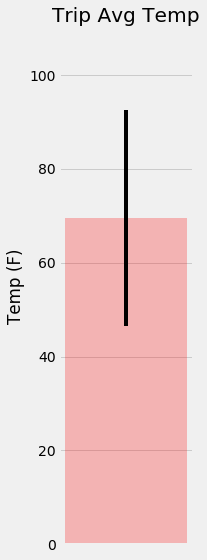

In [452]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.


#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

plt.figure(figsize=(3,8))

# y-axis Error 
err = ttpyrs[1] - ttpyrs[0]

# x-axis Range
xaxis = np.arange(0.5,1,1.5)

#Plot The Bar plot with error
plt.bar(xaxis, ttpyrs[2],yerr=err,color='red',alpha=0.25)
plt.xticks([])
plt.ylim(0,110)
plt.grid(True)
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")

plt.tight_layout()
plt.savefig('Trip Avg Temp.png')
plt.show()



In [453]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

total_prec_station = session.query( Station.station, Station.name, Station.latitude, Station.longitude, \
                                   Station.elevation, func.sum(Measurement.prcp)).\
                                    filter(Measurement.date >= trip_prev_start).\
                                    filter(Measurement.date <= trip_prev_end).\
                                    filter(Measurement.station == Station.station).\
                                    group_by(Station.station). order_by(func.sum(Measurement.prcp).desc()).all()

print(total_prec_station)


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.36), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 1.15), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.08), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.06), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.68), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.33999999999999997), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]


In [454]:
# Other Recommended Analysis (Optional)


In [455]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")



[(62.0, 69.15384615384616, 77.0)]

In [456]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
# Use the 
#        trip_prev_start = trip_start - dt.timedelta(days=365)
#        trip_prev_end = trip_end - dt.timedelta(days=365)

# Use the start and end date to create a range of dates

#date_range_1 = np.arange(trip_prev_start, trip_prev_end)

#print(date_range_1)
#print(date_range_1[0])

datelist = []

for x in range(0,15):
    x = 15-x
    rec = trip_prev_end - dt.timedelta(days=x)
    rec = '{:%Y-%m-%d}'.format(rec)
    datelist.append(rec)

print(datelist)

# Strip the day and month from the dates.

date_stripped =[]

for x in datelist:
    rec = x[5:]
    date_stripped.append(rec)

print(date_stripped)
# Loop through the list of %m-%d strings and calculate the normals for each date



['2016-02-02', '2016-02-03', '2016-02-04', '2016-02-05', '2016-02-06', '2016-02-07', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-13', '2016-02-14', '2016-02-15', '2016-02-16']
['02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16']


In [457]:
# Loop Thru

sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

records_data = []

for x in date_stripped:
    dates_data = {}
    res = session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == x).all()
    dates_data['Min']=res[0][0]
    dates_data['Avg']=res[0][1]
    dates_data['Max']=res[0][2]
    records_data.append(dates_data)

print(records_data)

    

[{'Min': 59.0, 'Avg': 68.85964912280701, 'Max': 77.0}, {'Min': 58.0, 'Avg': 67.79661016949153, 'Max': 77.0}, {'Min': 61.0, 'Avg': 68.14035087719299, 'Max': 76.0}, {'Min': 59.0, 'Avg': 69.6842105263158, 'Max': 80.0}, {'Min': 58.0, 'Avg': 70.38983050847457, 'Max': 77.0}, {'Min': 60.0, 'Avg': 69.0, 'Max': 77.0}, {'Min': 56.0, 'Avg': 66.75438596491227, 'Max': 74.0}, {'Min': 57.0, 'Avg': 67.58928571428571, 'Max': 75.0}, {'Min': 56.0, 'Avg': 68.41666666666667, 'Max': 76.0}, {'Min': 61.0, 'Avg': 69.25, 'Max': 79.0}, {'Min': 60.0, 'Avg': 69.15789473684211, 'Max': 78.0}, {'Min': 58.0, 'Avg': 70.36206896551724, 'Max': 80.0}, {'Min': 62.0, 'Avg': 70.89473684210526, 'Max': 79.0}, {'Min': 56.0, 'Avg': 70.28813559322033, 'Max': 79.0}, {'Min': 59.0, 'Avg': 70.48214285714286, 'Max': 76.0}]


In [458]:
# Convert Into DataFrame

dt_temp_df = pd.DataFrame(records_data)
dt_temp_df.head()

# Add date Column to the dataframe
dt_temp_df['Date']= datelist
dt_temp_df.set_index(dt_temp_df['Date'],inplace=True,drop=True)
dt_temp_df


,Avg,Max,Min,Date
Date,,,,
2016-02-02,68.859649,77.0,59.0,2016-02-02
2016-02-03,67.796610,77.0,58.0,2016-02-03
2016-02-04,68.140351,76.0,61.0,2016-02-04
2016-02-05,69.684211,80.0,59.0,2016-02-05
2016-02-06,70.389831,77.0,58.0,2016-02-06
2016-02-07,69.000000,77.0,60.0,2016-02-07
2016-02-08,66.754386,74.0,56.0,2016-02-08
2016-02-09,67.589286,75.0,57.0,2016-02-09
2016-02-10,68.416667,76.0,56.0,2016-02-10


<Figure size 1080x576 with 0 Axes>

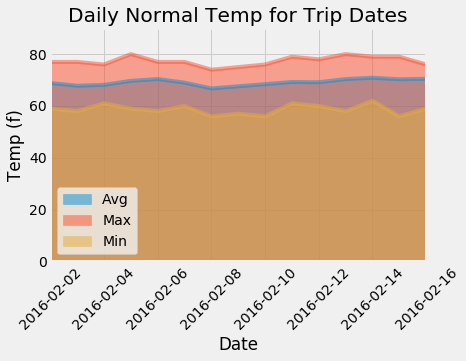

In [459]:
# Plot the stacked area graph

plt.figure(figsize=(15,8))

xaxis = dt_temp_df['Date'].tolist()
dt_temp_df.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.ylabel("Temp (f)")
plt.ylim(0,90)
plt.title('Daily Normal Temp for Trip Dates')

plt.savefig('Daily Normal Temp.png')
plt.show()
